In [1]:
import os
import sys
import numpy as np
from sklearn.decomposition import PCA


sys.path.insert(1, os.getenv("MOMAPS_HOME"))
from src.common.lib.utils import load_config_file
from src.datasets.dataset_spd import DatasetSPD
from src.common.lib.embeddings_utils import load_embeddings
import src.common.lib.synthetic_multiplexing as synthetic_multiplexing

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload 
%autoreload 2



/home/labs/hornsteinlab/sagyk/anaconda3/envs/cytoself_torch/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/labs/hornsteinlab/sagyk/anaconda3/envs/cytoself_torch/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/labs/hornsteinla

MOMAPS_HOME: /home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps


In [42]:
config_path_model = "./src/models/neuroself/configs/model_config/TLNeuroselfB78NoDSModelConfig"
config_path_data = "./src/datasets/configs/embeddings_data_config/EmbeddingsB9DatasetConfig"

In [43]:
config_model = load_config_file(config_path_model, 'model')
config_data = load_config_file(config_path_data, 'data', config_model.CONFIGS_USED_FOLDER)

print("init")

# print("Init datasets")
# dataset = DatasetSPD(config_data)

# print(f"Data shape: {dataset.X_paths.shape}, {dataset.y.shape}")

# __unique_labels_path = os.path.join(config_model.MODEL_OUTPUT_FOLDER, "unique_labels.npy")
# if os.path.exists(__unique_labels_path):
#     print(f"unique_labels.npy files has been detected - using it. ({__unique_labels_path})")
#     dataset.unique_markers = np.load(__unique_labels_path)

# dataset.flip, dataset.rot = False, False
# if config_data.SPLIT_DATA:
#     print("Split data...")
#     _, _, indexes = dataset.split()
# else:
#     indexes = None

init


In [44]:
config_data.SAMPLE_PCT

1

In [45]:
config_data.INPUT_FOLDERS

['/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch9_16bit_no_downsample']

In [46]:
embeddings, labels = load_embeddings(embeddings_type='all', config_model=config_model, config_data=config_data)

2023-08-30 17:33:42 INFO [load_embeddings] Model: preloaded                    Dataset: preloaded,                        embeddings_type: all
2023-08-30 17:33:42 INFO [load_embeddings] experiment_type = neurons
2023-08-30 17:33:42 INFO [load_embeddings] embeddings_layer = vqvec2
2023-08-30 17:33:42 INFO Input folder: /home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/outputs/models_outputs_batch78_nods_tl_ep23/embeddings/neurons/vqvec2/batch9_16bit_no_downsample, depth used: 4
2023-08-30 17:33:44 INFO [_load_stored_embeddings] Loading stored embeddings of label FUSHeterozygous_Untreated_ANXA11 of shape (527, 576, 4, 4) 
2023-08-30 17:33:45 INFO [_load_stored_embeddings] Loading stored embeddings of label FUSHeterozygous_Untreated_CD41 of shape (631, 576, 4, 4) 
2023-08-30 17:33:47 INFO [_load_stored_embeddings] Loading stored embeddings of label FUSHeterozygous_Untreated_CLTC of shape (432, 576, 4, 4) 
2023-08-30 17:33:49 INFO [_load_stored_embeddings] Loading stored embeddings 

In [47]:
embeddings_raw = embeddings.copy()

In [48]:
embeddings_raw.shape

(320151, 576, 4, 4)

In [5]:
# labels_flat = labels.reshape(-1,)

In [6]:
# p = "/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/outputs/models_outputs_batch78_nods_tl_ep23/embeddings/neurons/batch9_16bit_no_downsample/WT/Untreated/G3BP1/all2_embeddings.npy"

# data = np.load(p)
# data = data.reshape(data.shape[0], -1)
# data.shape

(9, 9216)

In [105]:

# from sklearn.manifold import MDS
# from umap import UMAP

# reducer = UMAP(n_components=100, random_state=1)#, max_iter=10)
# # reducer.fit(embeddings.reshape(embeddings.shape[0], -1))
# # print(reducer.explained_variance_ratio_)
# x = reducer.fit_transform(embeddings.reshape(embeddings.shape[0], -1))
# x.shape

---

# Multiplex

In [49]:
print(embeddings.shape)

(320151, 576, 4, 4)


In [50]:

df = synthetic_multiplexing.__embeddings_to_df(embeddings, labels.reshape(-1,), dataset_conf=config_data)
embeddings, label_data, unique_groups = synthetic_multiplexing.__get_multiplexed_embeddings(df, random_state=config_data.SEED)


2023-08-30 17:50:54 INFO [SM] Common markers: {'mitotracker', 'NCL', 'CD41', 'G3BP1', 'Calreticulin', 'PML', 'ANXA11', 'Phalloidin', 'TDP43', 'LAMP1', 'GM130', 'TOMM20', 'FMRP', 'PURA', 'KIF5A', 'PSD95', 'NEMO', 'CLTC', 'DCP1A', 'SCNA', 'TIA1', 'FUS', 'PEX14', 'NONO', 'SQSTM1'}
2023-08-30 17:50:54 INFO Pheno: FUSHeterozygous_Untreated
2023-08-30 17:50:54 INFO Detected 818 subgroups
2023-08-30 17:50:54 INFO 1/818
2023-08-30 17:50:54 INFO [1/818] Shape: (27676, 3)
2023-08-30 17:50:54 INFO 2/818
2023-08-30 17:50:54 INFO [2/818] Shape: (27651, 3)
2023-08-30 17:50:54 INFO 3/818
2023-08-30 17:50:54 INFO [3/818] Shape: (27626, 3)
2023-08-30 17:50:54 INFO 4/818
2023-08-30 17:50:54 INFO [4/818] Shape: (27601, 3)
2023-08-30 17:50:54 INFO 5/818
2023-08-30 17:50:54 INFO [5/818] Shape: (27576, 3)
2023-08-30 17:50:54 INFO 6/818
2023-08-30 17:50:54 INFO [6/818] Shape: (27551, 3)
2023-08-30 17:50:55 INFO 7/818
2023-08-30 17:50:55 INFO [7/818] Shape: (27526, 3)
2023-08-30 17:50:55 INFO 8/818
2023-08-30

In [51]:
np.save("/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/sandbox/sm_embeddings_b9_new", embeddings)
np.save("/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/sandbox/sm_labels_b9_new", label_data)

In [56]:
label_data.shape

(9553, 1)

In [55]:
embeddings.shape

(9553, 230400)

In [57]:

from sklearn.manifold import MDS
from umap import UMAP

reducer = UMAP(n_components=100, random_state=1)#, max_iter=10)
# reducer.fit(embeddings.reshape(embeddings.shape[0], -1))
# print(reducer.explained_variance_ratio_)
x = reducer.fit_transform(embeddings.reshape(embeddings.shape[0], -1))
x.shape

(9553, 100)

-------- 

In [58]:
np.save("/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/sandbox/sm_embeddings_b9_new_umap100", x)
# np.save("/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/sandbox/mul_label_all_all", label_data)

In [34]:
x = np.load("/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/sandbox/sm_embeddings_b9_umap100.npy")
label_data = np.load("/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/sandbox/sm_labels_b9.npy")
x.shape

(11542, 100)

In [35]:
labels.shape, label_data.shape, x.shape, embeddings.shape

((319837, 1), (11542, 1), (11542, 100), (9889, 230400))

# Plot

2023-08-27 21:00:40 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-27 21:00:40 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-27 21:00:40 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same

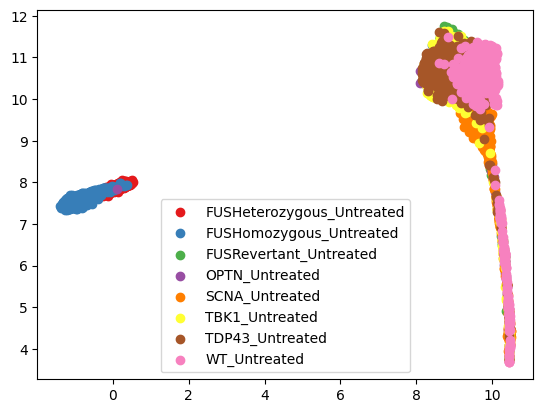

In [22]:

groups = np.unique(labels_flat)
colors = cm.get_cmap('Set1').colors

for i, g in enumerate(groups):
    ind = np.where(labels_flat == g)
    plt.scatter(x[ind,0], x[ind,1], c=colors[i])
plt.legend(groups)
plt.show()

2023-08-27 20:44:51 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-27 20:44:51 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-27 20:44:51 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same

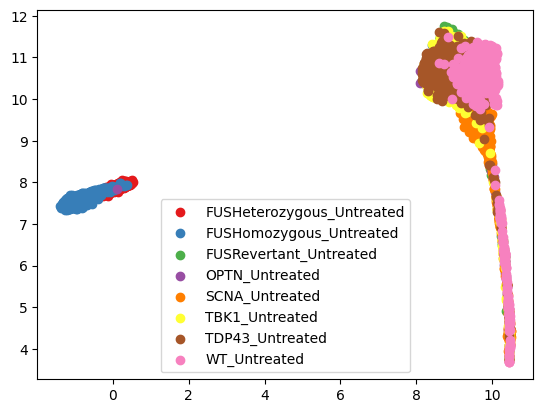

In [114]:

groups = np.unique(labels_flat)
colors = cm.get_cmap('Set1').colors

for i, g in enumerate(groups):
    ind = np.where(labels_flat == g)
    plt.scatter(x[ind,0], x[ind,1], c=colors[i])
plt.legend(groups)
plt.show()

2023-08-27 16:08:57 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-27 16:08:57 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-27 16:08:57 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same

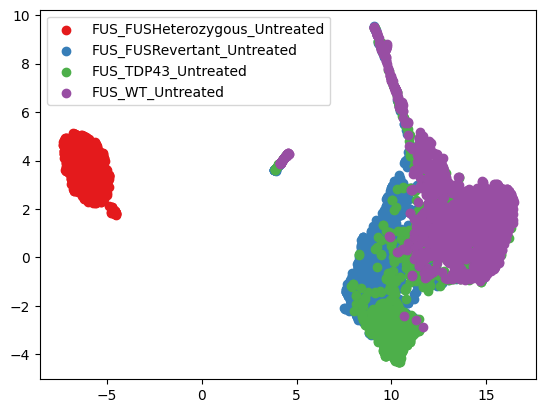

In [63]:

groups = np.unique(labels_flat)
colors = cm.get_cmap('Set1').colors

for i, g in enumerate(groups):
    ind = np.where(labels_flat == g)
    plt.scatter(x[ind,0], x[ind,1], c=colors[i])
plt.legend(groups)
plt.show()

2023-08-27 16:11:41 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-27 16:11:41 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-27 16:11:41 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same

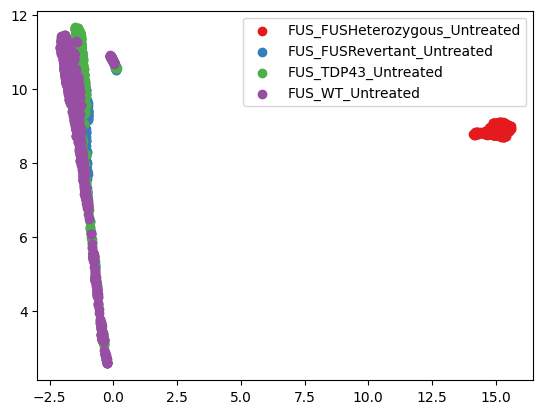

In [70]:
# 50 umaps
groups = np.unique(labels_flat)
colors = cm.get_cmap('Set1').colors

for i, g in enumerate(groups):
    ind = np.where(labels_flat == g)
    plt.scatter(x[ind,0], x[ind,1], c=colors[i])
plt.legend(groups)
plt.show()

2023-08-27 16:50:39 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-27 16:50:39 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-08-27 16:50:39 WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same

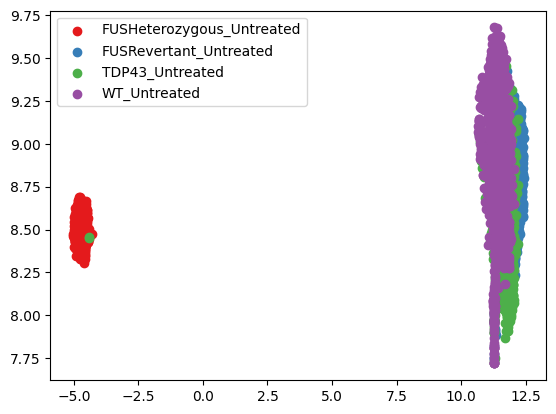

In [97]:
# 50 umaps multi
groups = np.unique(label_data.reshape(-1,))
colors = cm.get_cmap('Set1').colors

for i, g in enumerate(groups):
    ind = np.where(label_data.reshape(-1,) == g)
    plt.scatter(x[ind,0], x[ind,1], c=colors[i])
plt.legend(groups)
plt.show()

# Models

In [36]:
from sklearn.model_selection import train_test_split
labels_flat = label_data.reshape(-1,)
X_train, X_test, y_train, y_test = train_test_split(x, labels_flat, test_size=.2, stratify=labels_flat, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9233, 100) (2309, 100) (9233,) (2309,)


In [37]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), random_state=1)

In [63]:
mlp.n_layers_

3

In [47]:
# for i in range(5):
#     print(mlp.predict(X_test[[i]]), y_test[i])

['FUS_FUSRevertant_Untreated'] FUS_WT_Untreated
['FUS_FUSRevertant_Untreated'] FUS_FUSRevertant_Untreated
['FUS_FUSRevertant_Untreated'] FUS_FUSRevertant_Untreated
['FUS_FUSRevertant_Untreated'] FUS_TDP43_Untreated
['FUS_FUSHeterozygous_Untreated'] FUS_FUSHeterozygous_Untreated


In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=1)

In [31]:
def plot_conf_matrix(clf, normalize=None):
    from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix, confusion_matrix

    unique_labels = np.unique(clf.classes_)
    print(unique_labels)

    predictions = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions, labels=unique_labels, normalize=normalize)

    import seaborn as sns

    if normalize is None:
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    else:
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.show()
    # for i, l in enumerate(unique_labels):
    #     print(l)
    #     disp = ConfusionMatrixDisplay(conf_matrix[i])
    #     disp.plot()
    #     plt.show()

['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'SCNA_Untreated'
 'TBK1_Untreated' 'TDP43_Untreated' 'WT_Untreated']


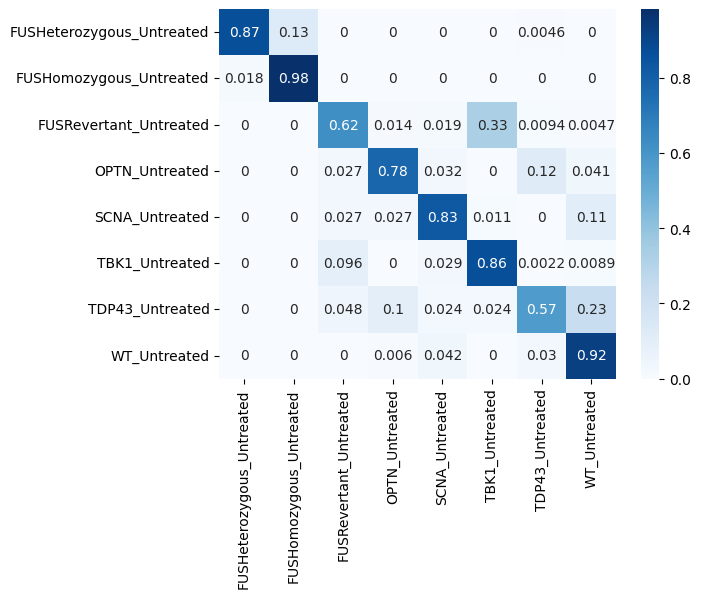

In [39]:
plot_conf_matrix(mlp, 'true')

['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'SCNA_Untreated'
 'TBK1_Untreated' 'TDP43_Untreated' 'WT_Untreated']


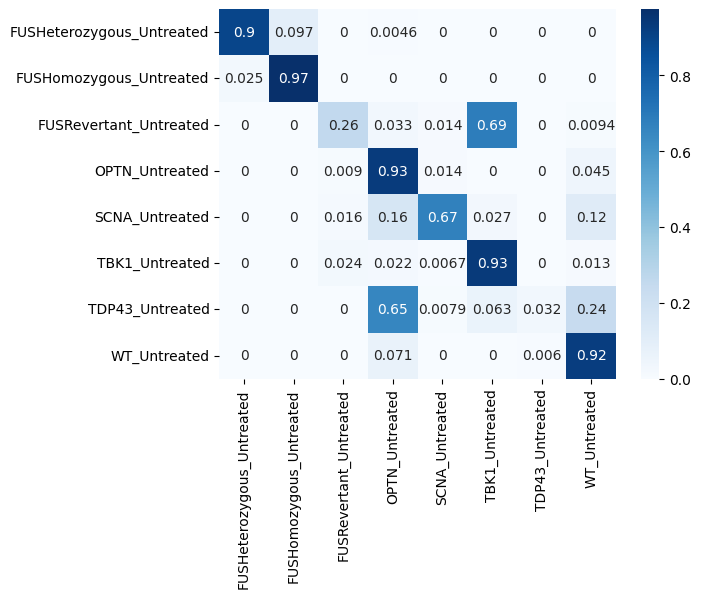

In [40]:
plot_conf_matrix(rfc, 'true')

['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'SCNA_Untreated'
 'TBK1_Untreated' 'TDP43_Untreated' 'WT_Untreated' 'WT_stress']


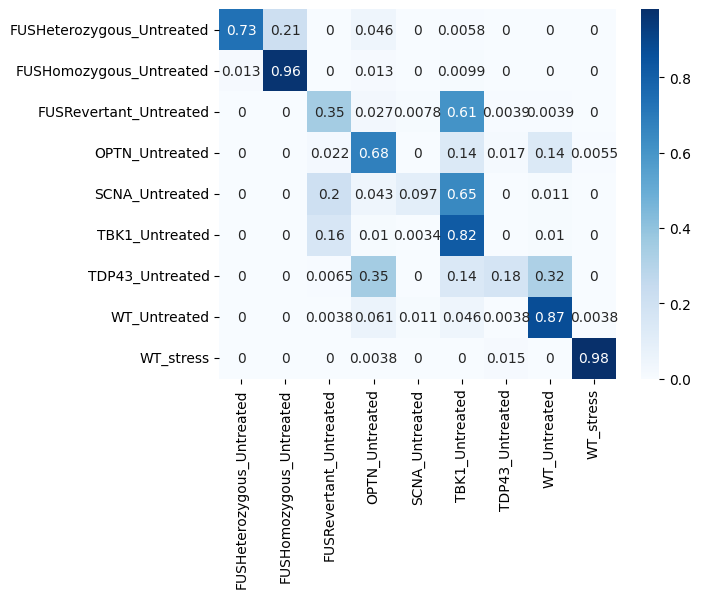

In [32]:
plot_conf_matrix(mlp, 'true')

['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'SCNA_Untreated'
 'TBK1_Untreated' 'TDP43_Untreated' 'WT_Untreated' 'WT_stress']


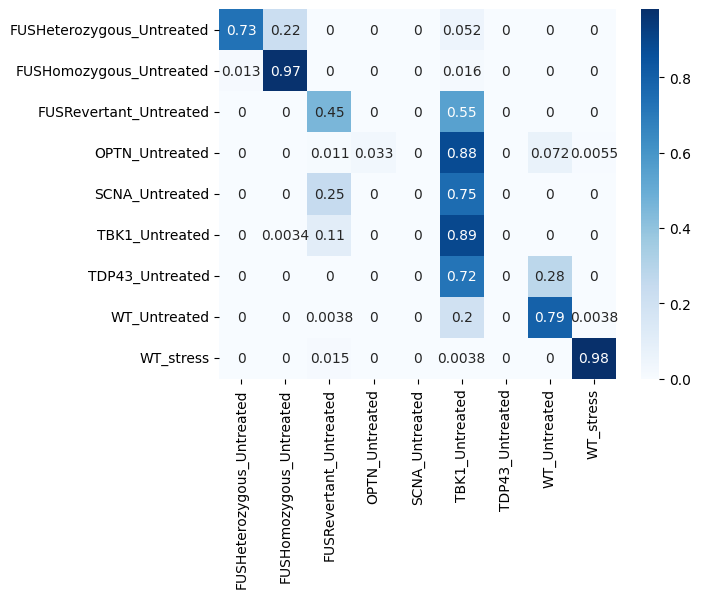

In [33]:
plot_conf_matrix(rfc, 'true')

['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'SCNA_Untreated'
 'TBK1_Untreated' 'TDP43_Untreated' 'WT_Untreated']


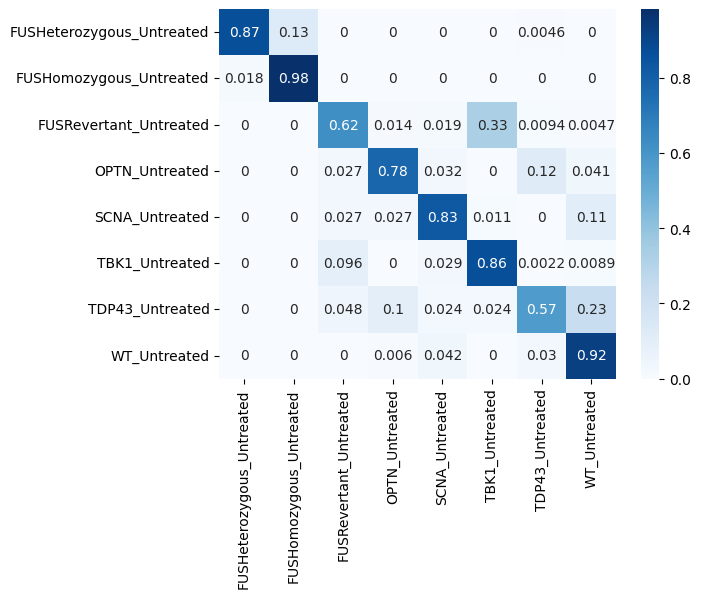

In [80]:
plot_conf_matrix(mlp, 'true')

### Utils

In [ ]:
def validate_classifier(model, X, y, default_model_scorer, class_names, sample_weight=None, title='', show_plot=False):
    """
    Perform full evaluation for a multi-class classifier on a given X and y

    :param model: sklearn Estimator (classifier)
    :param X: features matrix in a numpy matrix
    :param y: true labels in a numpy array (multi-class)
    :param default_model_scorer: string, sklearn.metric
    :param class_names: list of strings
    :param sample_weight: list of real numbers
    :param title: text
    :param show_plot: Boolean
    :return:

    """

    print("Validating - " + str(title) + "\n\n------------------")

    # -------- -------- -------- -------- -------- --------
    # Infer the probabilities for every class
    y_pred_prob = model.predict_proba(X)

    # Infer binary label to be used in classification_report()
    # by default, samples are classified to whichever class has the greatest probability (max)
    # y_pred_label = np.argmax(y_pred_prob, axis=1)  # nancy test
    y_pred = model.predict(X)
    # -------- -------- -------- -------- -------- --------

    print("\nBalanced accuracy score: " + str(balanced_accuracy_score(y_true=y, y_pred=y_pred, #sample_weight=sample_weight,
                            adjusted=False)) + ". \nBalanced accuracy score (adjusted): " + str(balanced_accuracy_score(y_true=y,
                                                                                                                        y_pred=y_pred,
                                                                                                                        #sample_weight=sample_weight,
                            adjusted=True)))
    # -------- -------- -------- -------- -------- --------
    macro_roc_auc_ovo = roc_auc_score(y, y_pred_prob, multi_class="ovo",
                                      average="macro")
    weighted_roc_auc_ovo = roc_auc_score(y, y_pred_prob, multi_class="ovo",
                                         average="weighted")

    macro_roc_auc_ovr = roc_auc_score(y, y_pred_prob, multi_class="ovr",
                                      average="macro" #, sample_weight=sample_weight
                                      )
    weighted_roc_auc_ovr = roc_auc_score(y, y_pred_prob, multi_class="ovr",
                                         average="weighted" #, sample_weight=sample_weight
    )
    print("\n\nOne-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    print("\n\nOne-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))
    # -------- -------- -------- -------- -------- --------
    # ROC AUC curves for each class (one-vs-rest)
    _roc_auc_scores = plot_multiclass_area_under_curves(y_true=y, y_proba=y_pred_prob, n_classes=3,
                                                        class_names=class_names)#, sample_weight=sample_weight)

    print("\nHELDOUT SET - AUC ROC scores of each class: " + str(_roc_auc_scores))
    # -------- -------- -------- -------- -------- --------
    print("'nHELDOUT SET - Classification Report: \n" + str(
        classification_report(y_true=y, y_pred=y_pred, target_names=class_names)))#, sample_weight=sample_weight)))
    # -------- -------- -------- -------- -------- --------
    print("HELDOUT SET - Multilabel Confusion Matrix: \n" + str(
        multilabel_confusion_matrix(y_true=y, y_pred=y_pred, labels=[0, 1, 2])))#, sample_weight=sample_weight)))
    # -------- -------- -------- -------- -------- --------
    matplotlib.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=(4, 4))
    plot_confusion_matrix(estimator=model, X=X, y_true=y, display_labels=class_names, cmap=plt.cm.get_cmap('plasma'))
    plt.title('Confusion matrix "one vs. rest"', fontsize=20, color='black')
    plt.show(block=False)
    plt.savefig(os.path.join(MAIN_FOLDER, 'figures', 'multiclass', 'ovr_confusion_matrix_all_classes_heldout.png'),bbox_inches='tight',dpi=1200)
    plt.close()
    # -------- -------- -------- -------- -------- --------
    cnf_matrix = confusion_matrix(y_true=y, y_pred=y_pred, #sample_weight=sample_weight,
                                  labels=[0, 1, 2])
    print("\nHELDOUT SET - One-vs-rest Confusion Matrix:\n" + str(cnf_matrix))

    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    TPR = TP / (TP + FN)
    print("Sensitivity, hit rate, recall, or true positive rate: " + str(TPR))

    TNR = TN / (TN + FP)
    print("Specificity or true negative rate: " + str(TNR))

    PPV = TP / (TP + FP)
    print("Precision or positive predictive value: " + str(PPV))

    NPV = TN / (TN + FN)
    print("Negative predictive value: " + str(NPV))

    FPR = FP / (FP + TN)
    print("Fall out or false positive rate: " + str(FPR))

    FNR = FN / (TP + FN)
    print("False negative rate: " + str(FNR))

    FDR = FP / (TP + FP)
    print("False discovery rate: " + str(FDR))

    ACC = (TP + TN) / (TP + FP + FN + TN)
    print("Overall accuracy: " + str(ACC))

    # -------- -------- -------- -------- -------- --------
    test_score = model.score(X, y)#, sample_weight=sample_weight)

    print(
        "Performance score " + str(default_model_scorer) + " on the held-out test-set (25%): " + str(test_score))

    return test_score


def fit_and_plot_multiclass_cv_auc_roc_curves(estimator, cv_k_fold, X, y, n_classes, sample_weight=None, title="", minimal_legend=False):
    """
    For every class, plot a curve per fold.
    A total of (n_classes * n_folds) AUC ROC curves are presented in the plot
    :param estimator:
    :param cv_k_fold:
    :param X:
    :param y:
    :param n_classes:
    :param title:
    :return:
    """

    tprs, aucs = [], []
    mean_fpr = np.linspace(0, 1, 100)
    _tpr, _fpr, _roc_auc = dict(), dict(), dict()
    _roc_auc2 = defaultdict(list)
    fig, ax = plt.subplots(figsize=(5, 5))

    for i, (train_fold, test_fold) in enumerate(cv_k_fold.split(X, y)):
        # -------- -------- -------- -------- -------- --------
        # Train a model on the train set
        estimator.fit(X[train_fold], y[train_fold])
        # Get the true labels (classes)
        # Binarize labels in a one-vs-all fashion
        y_true = label_binarize(y[test_fold], classes=[0, 1, 2])
        # -------- -------- -------- -------- -------- --------
        # Validate on test set
        y_proba = estimator.predict_proba(X[test_fold])
        # -------- -------- -------- -------- -------- --------
        # For every class, plot a curve per fold (n_class * n_folds)
        for j, class_color, class_name in zip(range(n_classes), colors, class_names):

            # calculate AUC ROC - generate TPR and FPR curves
            _fpr[j], _tpr[j], _ = roc_curve(y_true[:, j],
                                          y_proba[:, j],
                                          #sample_weight=sample_weight,
                                          drop_intermediate=True)

            _roc_auc[j] = auc(_fpr[j], _tpr[j])
            _roc_auc2[class_name].append(auc(_fpr[j], _tpr[j]))

            viz = RocCurveDisplay(fpr=_fpr[j], tpr=_tpr[j], roc_auc=_roc_auc[j], estimator_name=class_name)
            # Set a legend for each fold and each class
            viz.plot(ax=ax, name=class_name + ' fold {}'.format(i + 1), alpha=0.8, lw=1.8, linestyle=':',
                         color=class_color)

            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)
        # -------- -------- -------- -------- -------- --------

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='dimgray', label='Chance', alpha=.5)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='black',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=1.0)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.01, 1.05], ylim=[-0.01, 1.05])

    plt.title(title, color='black', fontsize=20)
    plt.xlabel('False Positive Rate (%)', fontsize=20, color='black')
    plt.ylabel('True Positive Rate (%)', fontsize=20, color='black')

    if minimal_legend:

        # manually define new legend patchs, instead of current legend (AKA, for each class and at each fold)

        # data already plotted to ax
        handles, labels = ax.get_legend_handles_labels()

        # Set a single legend for each class, with the range of AUC ROC on all folds (min - max)
        minimal_labels = []
        for (class_name, cls_aucs), class_color in zip(_roc_auc2.items(), colors):
            min_fold = str(round(min(cls_aucs), 2))
            max_fold = str(round(max(cls_aucs), 2))
            text = class_name + ' AUC = (' + min_fold + ' - ' + max_fold + ')'
            # append manual patchs
            handles.append(mpatches.Patch(color=class_color, alpha=0.8, lw=1.8, linestyle=':', label=text))

        # reorder
        handles = [handles[13], handles[14], handles[12], handles[9], handles[10], handles[11]]

        # plot the legend
        plt.legend(handles=handles, loc="lower right", prop={"size": 14}, bbox_to_anchor=(1.5, 1.5))
    else:
        ax.legend(loc="lower right", prop={"size": 14}, bbox_to_anchor=(1.5, 1.5))

    plt.show(block=False)
    plt.savefig(os.path.join(MAIN_FOLDER, 'figures', 'multiclass', 'AUC_ROC_per_class_training.png'), bbox_inches='tight',
                dpi=1200)
    plt.close()
    return aucs

def plot_multiclass_area_under_curves(y_true, y_proba, n_classes, class_names):#, sample_weight):
    """
    Study the output of a multi-class classifier.
    One curve can be drawn per class/label and consider precision-recall and roc curves for each class.

    Note: it is necessary to binarize y_true, and y_proba should be class probabilities (using "predict_proba()").

    :param y_true: numpy
    :param y_proba: numpy
    :param n_classes: int

    :return: roc_auc
    """

    # Binarize labels in a one-vs-all fashion
    y = label_binarize(y_true, classes=[0, 1, 2])

    # ROC curve
    tpr, fpr = dict(), dict()

    # ROC score
    roc_auc = dict()

    # precision recall curve
    precision = dict()
    recall = dict()
    # precision score
    precision_score = dict()

    # colors = cycle(['deepskyblue', 'orangered', 'seagreen'])
    fig = plt.figure(figsize=(5, 5))

    for i in range(n_classes):
        # calculate AUC ROC - generate TPR and FPR curves
        fpr[i], tpr[i], _ = roc_curve(y[:, i], y_proba[:, i])#, sample_weight=sample_weight)
        roc_auc[i] = auc(fpr[i], tpr[i])
        # calculate precision-recall
        precision[i], recall[i], _ = precision_recall_curve(y_true=y[:, i], probas_pred=y_proba[:, i])#,sample_weight=sample_weight)
        precision_score[i] = average_precision_score(y_true=y[:, i], y_score=y_proba[:, i], average="weighted")

    # ----------------------------------------------------------------
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_proba.ravel())#, sample_weight=sample_weight)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # ----------------------------------------------------------------
    # aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------------------------------------
    # Draw ROC curves for all classes
    for i, color, name in zip(range(n_classes), colors, class_names):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.4,
                 label='{0} (AUC = {1:0.2f})'
                       ''.format(name, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    ax = fig.gca()
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.title("ROC multi-class prediction in held-out data", fontsize=20, color='black')
    plt.legend(loc="best", prop={'size': 14})
    plt.show(block=False)
    plt.savefig(os.path.join(MAIN_FOLDER, 'figures', 'multiclass', 'AUC_ROC_per_class_heldout.png'), bbox_inches='tight', dpi=1200)
    plt.close()

    # ----------------------------------------------------------------
    # Draw Precision-Recall curves
    fig = plt.figure(figsize=(5, 5))
    for i, color, name in zip(range(n_classes), colors, class_names):
        plt.plot(recall[i], precision[i], color=color, lw=1.4, label=' {0} (weighted avg. precision = {1:0.2f})'
                                                                     ''.format(name, precision_score[i]))

    ax = fig.gca()
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel("Recall", fontsize=20)
    plt.ylabel("Precision", fontsize=20)

    plt.legend(loc="best", prop={'size': 14})
    plt.suptitle("Precision-Recall curves in held-out data", fontsize=20, color='black')
    plt.show(block=False)
    plt.savefig(os.path.join(MAIN_FOLDER, 'figures', 'multiclass', 'precision_recall_curves_per_class_heldout.png'), bbox_inches='tight',
                dpi=1200)
    plt.close()

    # ----------------------------------------------------------------
    # Plot all ROC curves (EXTENDED PLOT..)
    # ----------------------------------------------------------------
    fig = plt.figure(figsize=(5, 5))

    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=1.4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=1.4)

    for i, color, name in zip(range(n_classes), colors, class_names):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.4,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(name, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    ax1 = fig.gca()
    ax1.tick_params(axis='both', which='major', labelsize=14)

    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.title("ROC multi-class prediction in held-out data", fontsize=20, color='black')
    plt.legend(loc="best", prop={'size': 14})

    plt.show(block=False)
    plt.savefig(os.path.join(MAIN_FOLDER, 'figures', 'multiclass', 'extension_AUC_ROC_per_class_heldout.png'), bbox_inches='tight',
                dpi=1200)
    plt.close()

    return roc_auc


### Reports

In [95]:
def cv_report(get_clf, x, labels_flat):
    from sklearn.metrics import classification_report
    from sklearn.model_selection import StratifiedKFold

    skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    for i, (train_index, test_index) in enumerate(skf.split(x, labels_flat)):
        print(i)
        print(train_index[:2], test_index[:2])
        x_train, y_train = x[train_index], labels_flat[train_index]
        x_test, y_test = x[test_index], labels_flat[test_index]

        print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

        clf = get_clf() #MLPClassifier(hidden_layer_sizes=(50,), activation='relu', random_state=1)
        clf.fit(x_train, y_train)

        predictions = clf.predict(x_test)
        print(classification_report(y_test, predictions))

In [96]:
cv_report(lambda : MLPClassifier(hidden_layer_sizes=(50,), activation='relu', random_state=1), x, labels_flat)

0
[0 2] [1 5]
(9233, 100) (9233,) (2309, 100) (2309,)
                           precision    recall  f1-score   support

FUSHeterozygous_Untreated       0.99      0.76      0.86       218
  FUSHomozygous_Untreated       0.89      1.00      0.94       437
   FUSRevertant_Untreated       0.72      0.16      0.26       212
           OPTN_Untreated       0.84      0.68      0.75       222
           SCNA_Untreated       0.79      0.79      0.79       184
           TBK1_Untreated       0.65      0.96      0.78       448
          TDP43_Untreated       0.68      0.63      0.65       252
             WT_Untreated       0.83      0.86      0.85       336

                 accuracy                           0.78      2309
                macro avg       0.80      0.73      0.74      2309
             weighted avg       0.79      0.78      0.76      2309

1
[0 1] [3 4]
(9233, 100) (9233,) (2309, 100) (2309,)
                           precision    recall  f1-score   support

FUSHeterozygous_U

In [91]:
# from sklearn.metrics import classification_report
# from sklearn.model_selection import StratifiedKFold

# skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
# for i, (train_index, test_index) in enumerate(skf.split(x, labels_flat)):
#     print(i)
#     print(train_index[:2], test_index[:2])
#     x_train, y_train = x[train_index], labels_flat[train_index]
#     x_test, y_test = x[test_index], labels_flat[test_index]

#     print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#     mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', random_state=1)
#     mlp.fit(x_train, y_train)

#     predictions = mlp.predict(x_test)
#     print(classification_report(y_test, predictions))

### 2 UMAPS

['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'SCNA_Untreated'
 'TBK1_Untreated' 'TDP43_Untreated' 'WT_Untreated']


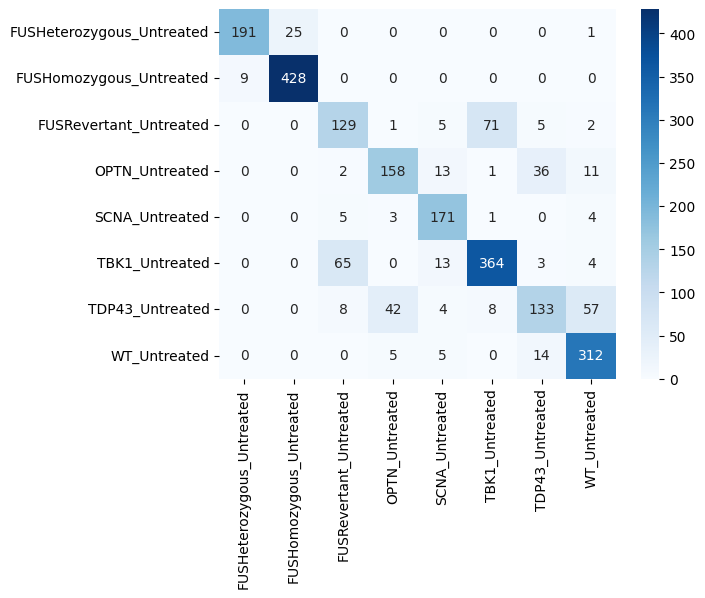

In [40]:
plot_conf_matrix(mlp)

['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'SCNA_Untreated'
 'TBK1_Untreated' 'TDP43_Untreated' 'WT_Untreated']


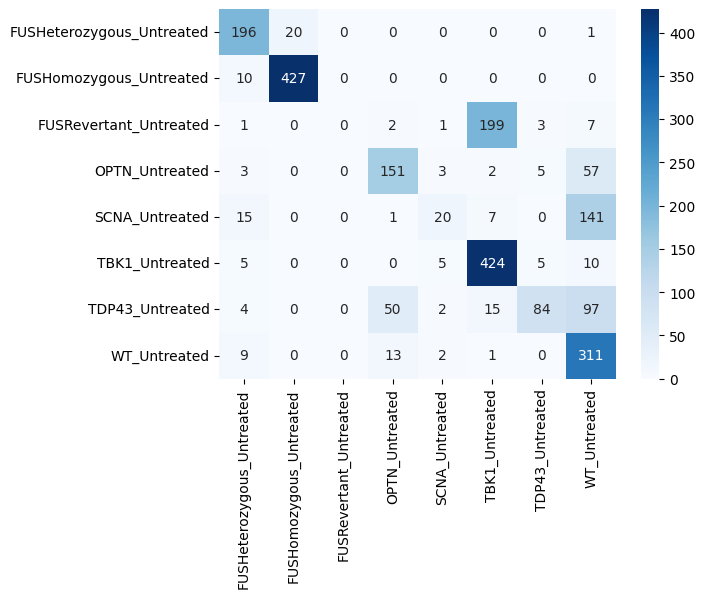

In [41]:
plot_conf_matrix(rfc)

### 100 UMAPS

['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'SCNA_Untreated'
 'TBK1_Untreated' 'TDP43_Untreated' 'WT_Untreated']


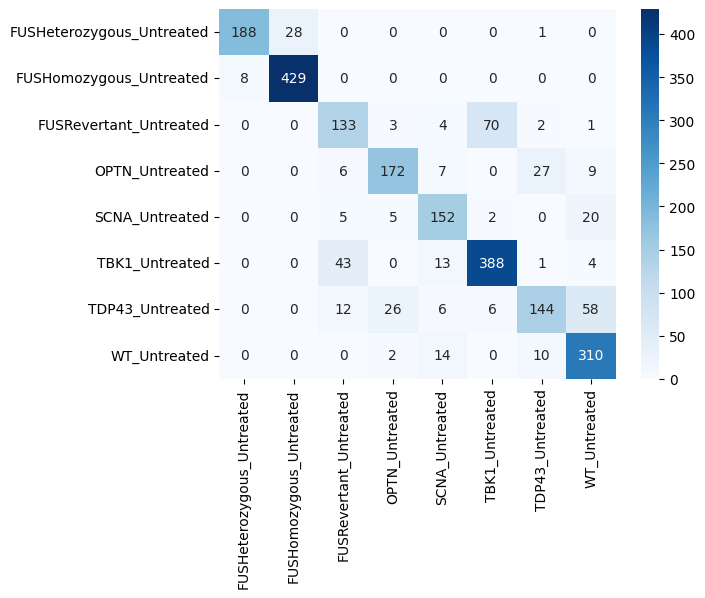

In [30]:
plot_conf_matrix(mlp)

['FUSHeterozygous_Untreated' 'FUSHomozygous_Untreated'
 'FUSRevertant_Untreated' 'OPTN_Untreated' 'SCNA_Untreated'
 'TBK1_Untreated' 'TDP43_Untreated' 'WT_Untreated']


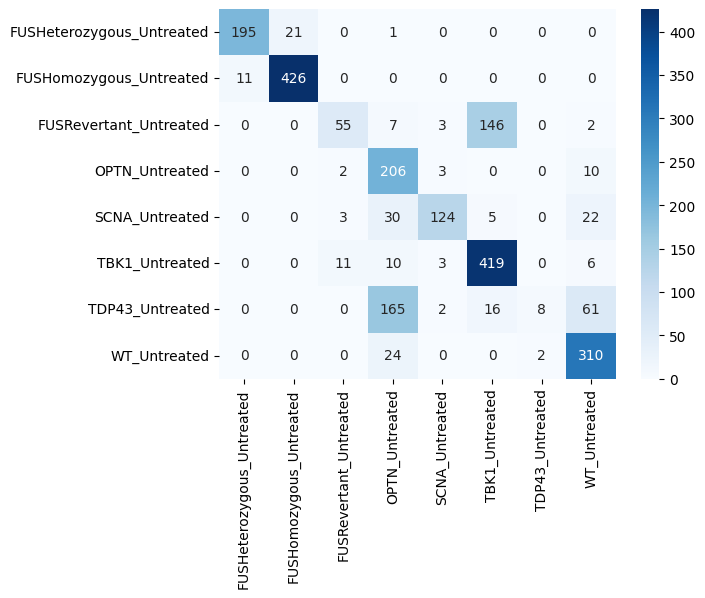

In [32]:
plot_conf_matrix(rfc)

# PLOTS old

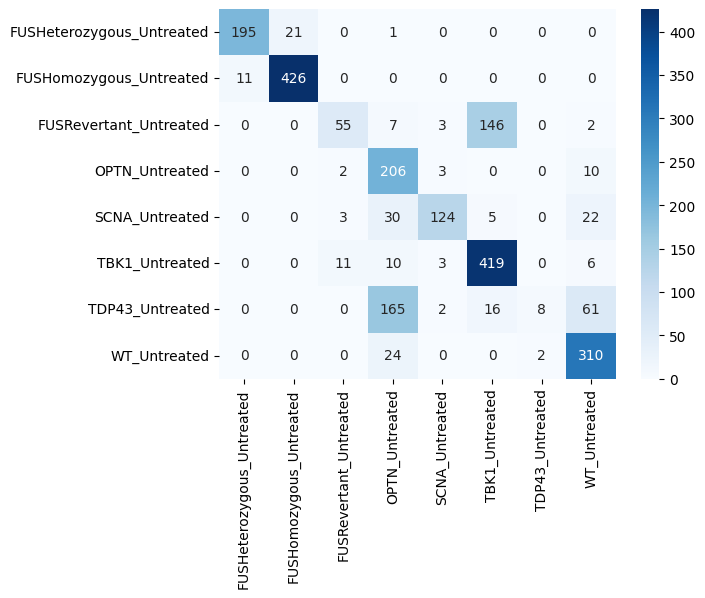

In [18]:
plot_conf_matrix(rfc)

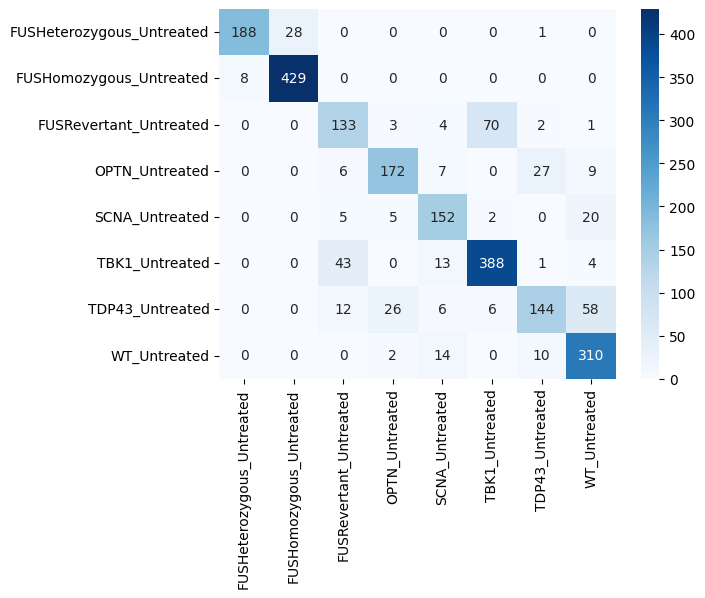

In [19]:
plot_conf_matrix(mlp)

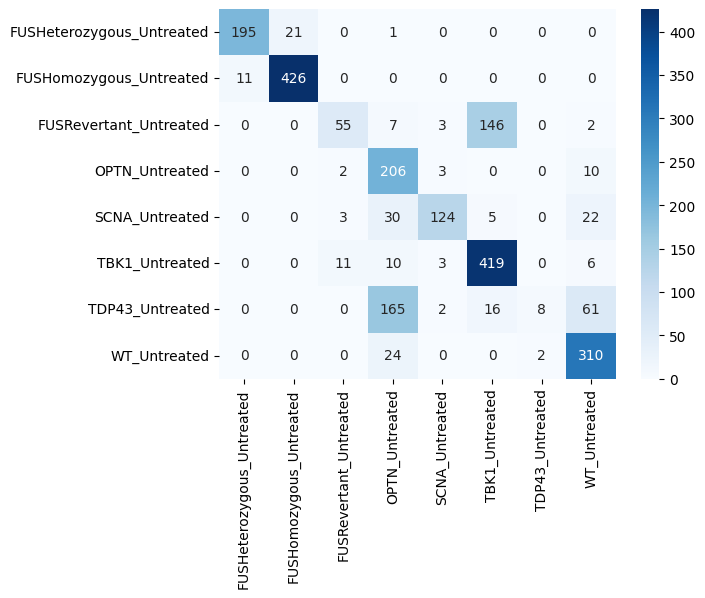

In [116]:
plot_conf_matrix(rfc)

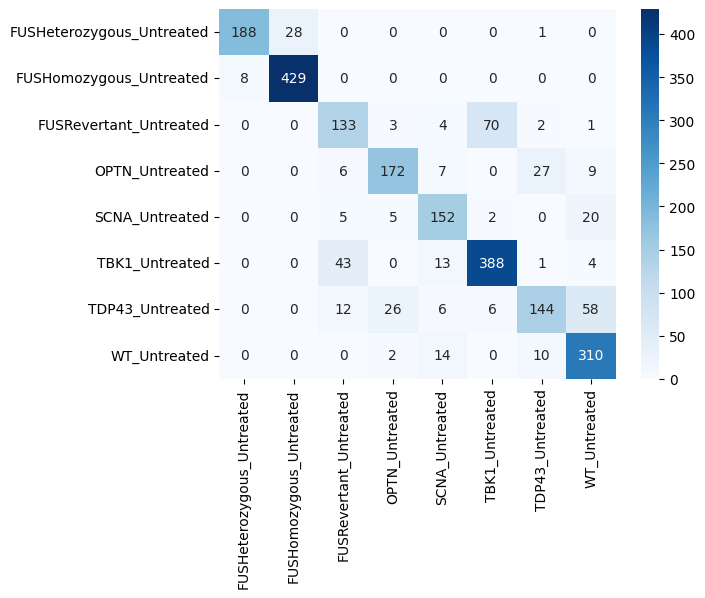

In [119]:
plot_conf_matrix(mlp)

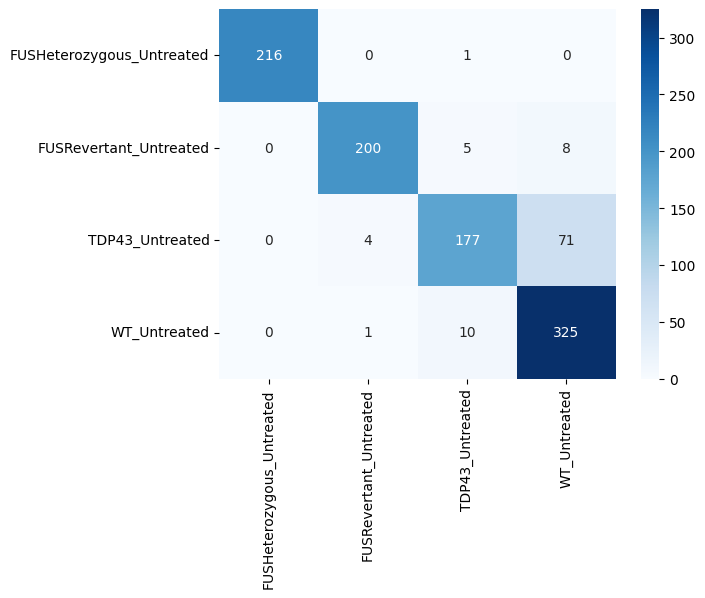

In [99]:
plot_conf_matrix(rfc)

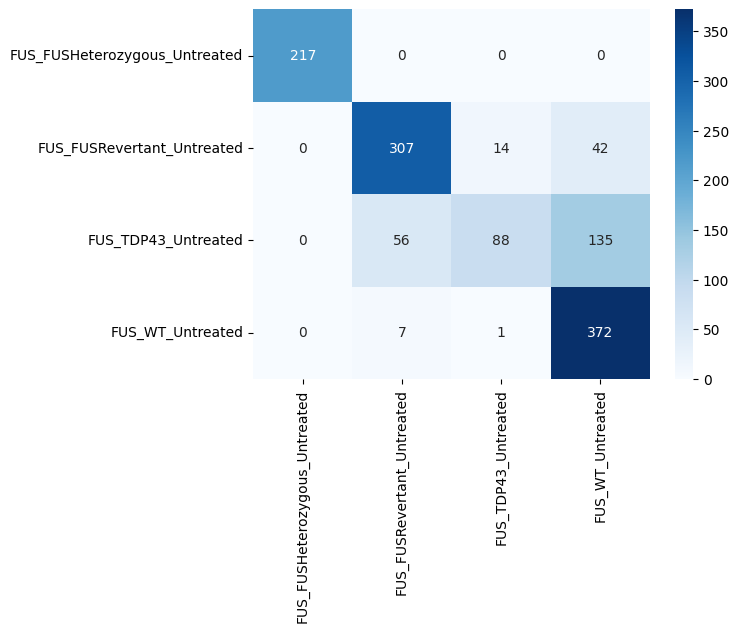

In [67]:
def plot_conf_matrix(clf):
    from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix, confusion_matrix

    unique_labels = np.unique(mlp.classes_)

    predictions = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions, labels=unique_labels)

    import seaborn as sns

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.show()
    # for i, l in enumerate(unique_labels):
    #     print(l)
    #     disp = ConfusionMatrixDisplay(conf_matrix[i])
    #     disp.plot()
    #     plt.show()
    
plot_conf_matrix(rfc)

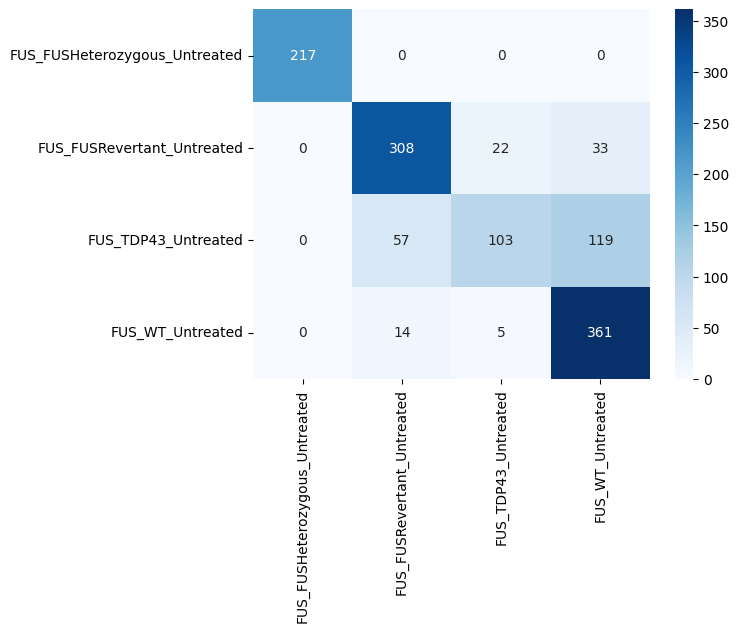

In [74]:
#50 umaps
def plot_conf_matrix(clf):
    from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix, confusion_matrix

    unique_labels = np.unique(mlp.classes_)

    predictions = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions, labels=unique_labels)

    import seaborn as sns

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.show()
    # for i, l in enumerate(unique_labels):
    #     print(l)
    #     disp = ConfusionMatrixDisplay(conf_matrix[i])
    #     disp.plot()
    #     plt.show()
    
plot_conf_matrix(rfc)

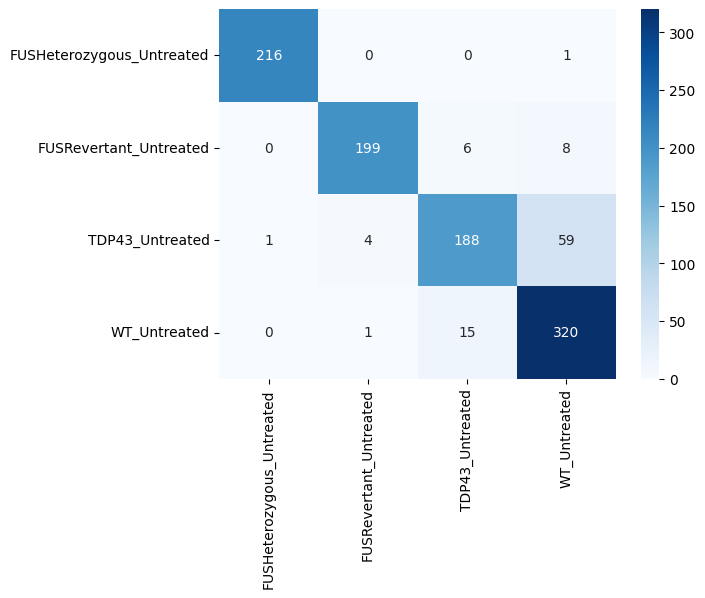

In [95]:
#Multiplex

def plot_conf_matrix(clf):
    from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix, confusion_matrix

    unique_labels = np.unique(mlp.classes_)

    predictions = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions, labels=unique_labels)

    import seaborn as sns

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.show()
    # for i, l in enumerate(unique_labels):
    #     print(l)
    #     disp = ConfusionMatrixDisplay(conf_matrix[i])
    #     disp.plot()
    #     plt.show()
    
plot_conf_matrix(rfc)

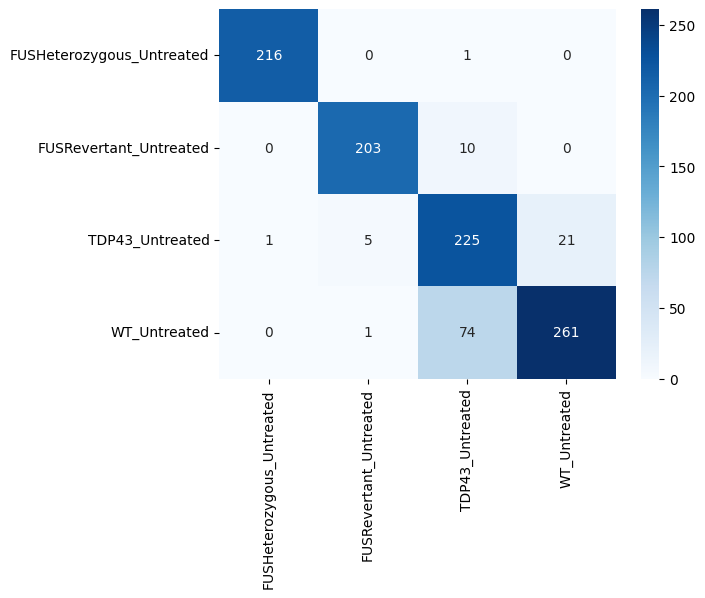

In [96]:
#multi 50umaps
plot_conf_matrix(mlp)

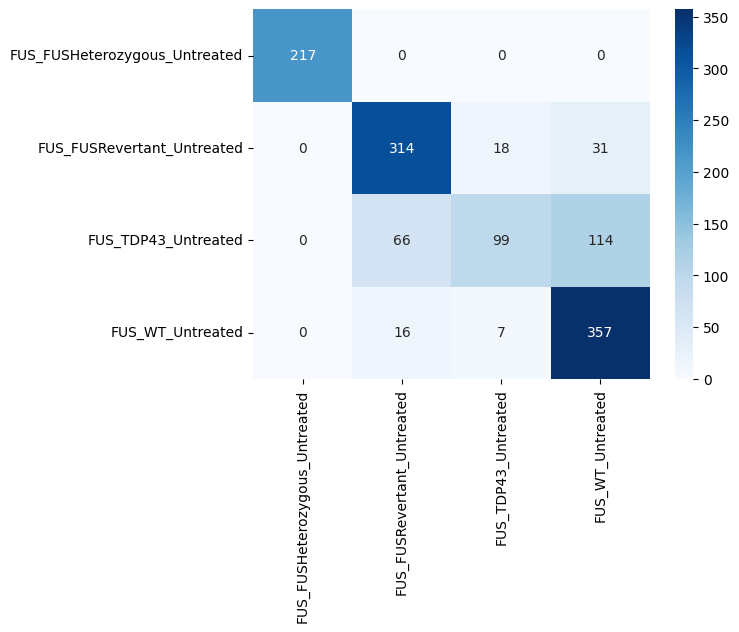

In [68]:
plot_conf_matrix(mlp)

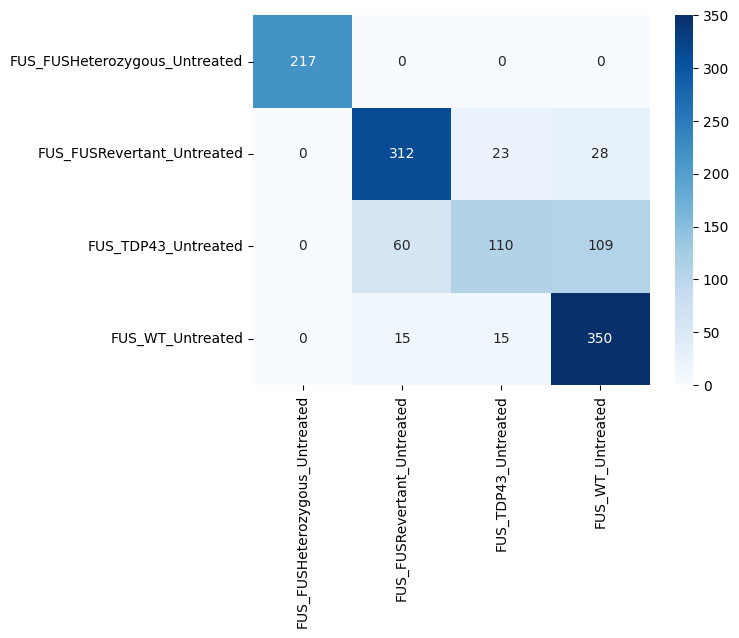

In [75]:
#50umaps
plot_conf_matrix(mlp)

In [41]:
from xgboost import XGBClassifier

# create model instance
bst = XGBClassifier(n_estimators=20, max_depth=4, learning_rate=0.1, objective='multi:softmax')
# fit model
bst.fit(X_train, y_train)
# # make predictions
# preds = bst.predict(X_test)

(4953, 2) (1239, 2) (4953, 1) (1239, 1)


/home/labs/hornsteinlab/sagyk/anaconda3/envs/cytoself_torch/lib/python3.9/site-packages/xgboost/sklearn.py:1438: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or not (self.classes_ == expected_classes).all()


AttributeError: 'bool' object has no attribute 'all'